In [1]:
import pathlib
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout

from PIL import Image

In [2]:
PATH = '/kaggle/input/medical-mnist'

p = pathlib.Path(PATH)

labels = [x.parts[-1] for x in p.iterdir()]

num_classes = len(labels)
labels.sort()
labels

['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']

In [3]:
files_path = []
files_labels = []

for root, dirs, files in os.walk(PATH):
  p = pathlib.Path(root)
  
  for file in files:
    files_path.append(root + '/' + file)
    files_labels.append(p.parts[-1])

In [4]:
files_path[0]

'/kaggle/input/medical-mnist/AbdomenCT/003646.jpeg'

In [5]:
label_cnt = []

for label in labels:
  print(label, files_labels.count(label))
  label_cnt.append(files_labels.count(label))

AbdomenCT 10000
BreastMRI 8954
CXR 10000
ChestCT 10000
Hand 10000
HeadCT 10000


<BarContainer object of 6 artists>

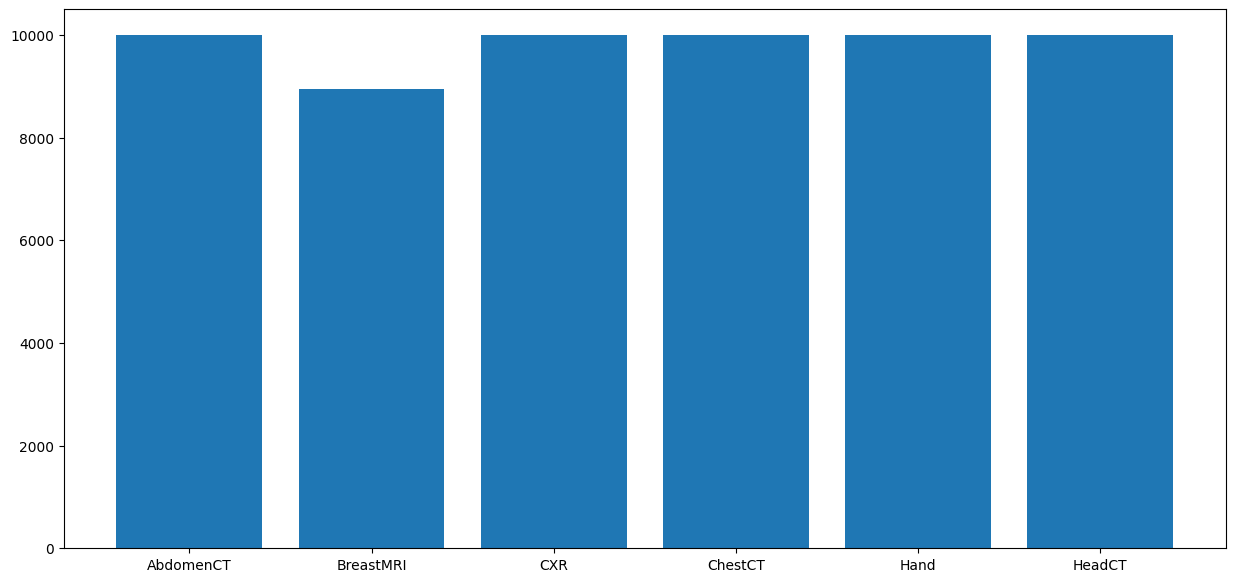

In [6]:
plt.figure(figsize=(15, 7))
plt.bar(labels, label_cnt)

In [7]:
def prepare_X_y(files_path, width=64, height=64):
  X = []
  y = []

  for path in files_path:
    img = Image.open(path)
    img.load()

    if (width or height) != 64:
      img = img.resize((width, height))
    
    img_X = np.asarray(img, dtype=np.int16)
    X.append(img_X)

  X = np.array(X)
  y = np.array(files_labels)

  return X, y

In [8]:
X, y = prepare_X_y(files_path)
X.shape, y.shape

((58954, 64, 64), (58954,))

Text(0.5, 1.0, 'BreastMRI')

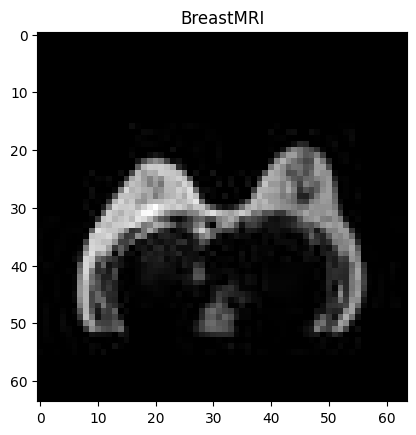

In [9]:
plt.imshow(X[12000], cmap='gray')
plt.title(y[12000])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
X_train.shape, y_train.shape

((41267, 64, 64), (41267,))

In [12]:
def preprocess(X_train, y_train, X_test, y_test):
  y_train = list(map(lambda x: labels.index(x), y_train))
  y_train = np.array(y_train)

  y_test = list(map(lambda x: labels.index(x), y_test))
  y_test = np.array(y_test)  

  y_train = to_categorical(y_train, num_classes)
  y_test = to_categorical(y_test, num_classes)

  return X_train, y_train, X_test, y_test

In [13]:
X_train, y_train, X_test, y_test = preprocess(X_train, y_train, X_test, y_test)

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1) # = (B, 64x64)
X_test = X_test.reshape(X_test.shape[0], -1)

In [15]:
def get_model():
  model = Sequential([
      Dense(1024, kernel_initializer="glorot_uniform", activation='relu'),
      Dense(256, kernel_initializer="glorot_uniform", activation='relu'),
      Dense(64, kernel_initializer="glorot_uniform", activation='relu'),
      Dense(num_classes, kernel_initializer="glorot_uniform", activation='softmax'),
  ])

  return model

In [16]:
BATCH_SIZE = 32
history_acc = []
history_val_acc = []
history_loss = []
history_val_loss = []
model = get_model()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, batch_size=BATCH_SIZE, epochs=10)
history_acc = history.history['accuracy']
history_val_acc = history.history['val_accuracy']
history_loss = history.history['loss']
history_val_loss = history.history['val_loss']

Epoch 1/10
1290/1290 [==============================] - 53s 40ms/step - loss: 14.5933 - accuracy: 0.9185 - val_loss: 0.4067 - val_accuracy: 0.9774
Epoch 2/10
1290/1290 [==============================] - 48s 38ms/step - loss: 0.9032 - accuracy: 0.9544 - val_loss: 0.1413 - val_accuracy: 0.9889
Epoch 3/10
1290/1290 [==============================] - 49s 38ms/step - loss: 0.2738 - accuracy: 0.9684 - val_loss: 0.1889 - val_accuracy: 0.9664
Epoch 4/10
1290/1290 [==============================] - 50s 39ms/step - loss: 0.2629 - accuracy: 0.9646 - val_loss: 0.0704 - val_accuracy: 0.9903
Epoch 5/10
1290/1290 [==============================] - 50s 39ms/step - loss: 0.1128 - accuracy: 0.9800 - val_loss: 0.2492 - val_accuracy: 0.9532
Epoch 6/10
1290/1290 [==============================] - 52s 40ms/step - loss: 0.1079 - accuracy: 0.9793 - val_loss: 0.1053 - val_accuracy: 0.9817
Epoch 7/10
1290/1290 [==============================] - 51s 40ms/step - loss: 0.0650 - accuracy: 0.9858 - val_loss: 0.0388 

In [17]:
def plot_acc_loss(history):
  plt.figure(figsize=(20, 6))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.legend()

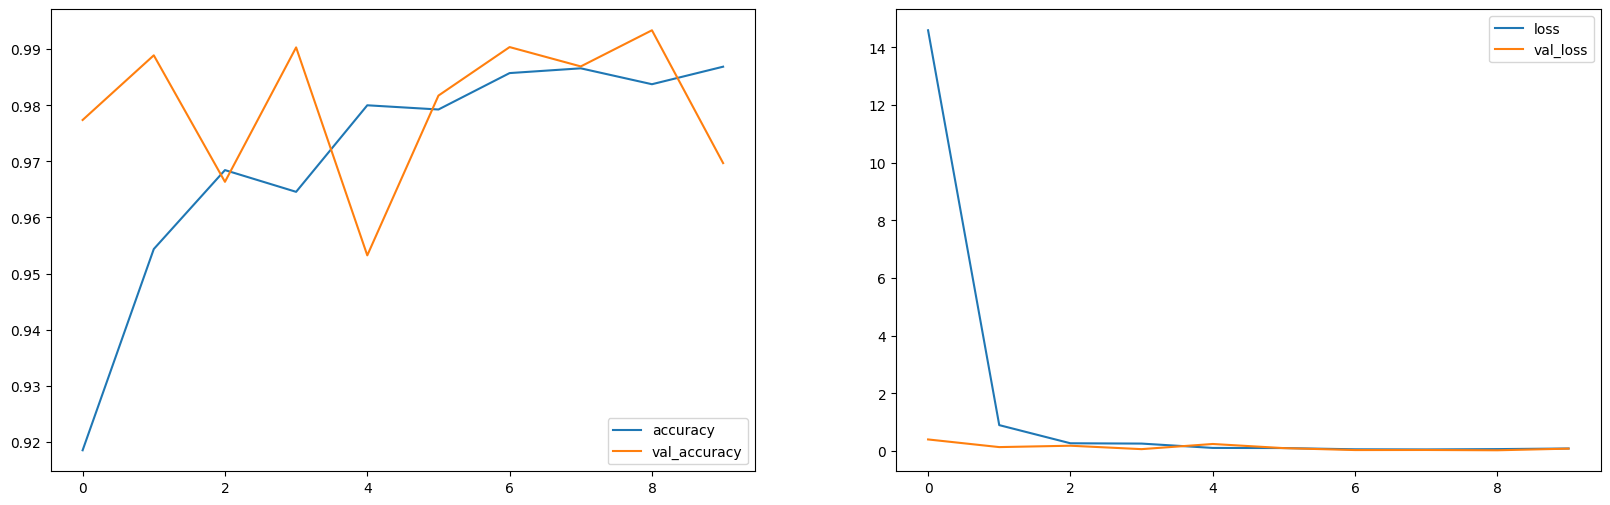

In [18]:
plot_acc_loss(history)